In [1]:
import numpy as np

## Systems
    building a dictionary with system specific model parameters/properties

In [ ]:
def get_system(modelName,**kwargs):
    """
      returns the system model
    input:
      modelName: name of the system model
      kwargs: some customizable inputs eg.
          threshold: threshold for the CUSUM algorithm
          bias: bias for the CUSUM algorithm
          icd: inner circle depth
    output:
      model_dict: dictionary containing the system model
    """
    if modelName == "driveline": 
        # flexible driveline (patterson_Driveline Modeling and Control, Balau Andreea_OVERALL POWERTRAIN MODELING AND CONTROL BASED ON DRIVELINE SUBSYSTEMS INTEGRATION)
        # states: drive shaft torsion angle difference, engine angular velocity, wheel angular velocity
        # input: differnce between driving and friction torque i.e. effective engine torque (M_m-M_mfriction)
        # output: wheel angular velocity
        # i_t= 3.5; #  gearbox ratio(1st gear)
        # i_f= 3.7; #  final drive ratio
        # J_m= 0.17; #  (kg.m^2) engine inertia
        # J_t= 0.014; #  (kg.m^2) transmission inertia
        # J_f= 0.031; #  (kg.m^2) final drive inertia
        # J_w= 1; #  (kg.m^2) wheel inertia
        # c_r1= 0.01; # (Nm/kg) rolling co-eff
        # c_w= 0.3; #  0.6 #  (rad^-2) airdrag co-eff
        # c_r2= 0.36; #  (Nms/rad) approx. co-eff
        # FA= 2.7 # 9; #  (m^2) front area
        # rho= 1.2; #  (kg/m^3) air density
        # c= 65;#  (Nms/rad) internal dampling of drive shaft
        # k= 5000;#  (Nm/rad) drive shaft stiffness
        # b_t= 0.1; #  (Nms/rad) viscous damping co-eff causing friction torque at transmission
        # b_f= 0.1; #  (Nms/rad) viscous damping co-eff causing friction torque at final drive
        # b_w= 0.1; #  (Nms/rad) viscous damping co-eff causing friction torque at wheel
        # r_w= 0.32;#  0.52 # (m) wheel radius
        # m= 1400;#  24000 # (kg) vehicle mass
        # g= 9.8; #  (m/s^2) gravitational acceleration
        # alpha= 0; #  (radian) road slope angle
        # load= r_w*m*(c_r1+g*np.sin(alpha)); 
        # i = i_f+i_t
        # J1= J_m + J_t/i_t^2 + J_f/((i_t^2)*(i_f^2))
        # J2= J_w+m*r_w^2
        # b1= b_t/i_t^2 + b_f/((i_t^2)*(i_f^2))
        # b2= b_w+c_w*FA*rho*r_w^2+m*c_r2*r_w^2
        # Ac = np.matrix('''0, 1/i, -1;
        #     -k/(i*J1), -(b1+c/i^2)/J1, c/(i*J1);
        #     k/J2, c/(i*J2),-(c+b2)/J2''')
        # Bc = np.matrix('0;1/J1;0')
        # H = np.matrix('0;0;-1/J2') #  Ax+Bu+H*load
        # #  Bc = np.matrix('0 0;1/J1 0;0 -1/J2') #  [B H]*[u;load]
        # Cc = np.matrix('0,0,1')
        # Dc = np.matrix('0')
        Ac = np.matrix('''0   0.138888888889  -1;
                        -4053.310765454176  -7.369605282241   52.693039950904;
                        34.635633139374   0.062536559835  -0.809151654198''')
        Bc = np.matrix('0;   5.836767502254013;   0')
        Cc = np.matrix('0 0 1')
        Dc = np.matrix('0')
        Ts = 0.05
        A = np.matrix('''0.4176543471674   0.0044235903555  -0.0315517845433;
                        -129.0973421503850   0.2164557872032   5.5855760948704;
                        1.0928160343341   0.0066290104726   0.9348062028051''')
        B = np.matrix('''0.000790228837410;   0.191991791527431;   0.000846058170955''')
        # H = np.matrix('''0;
        #                  0;
        #                 -0.0069''')
        # load = [4.4800]
        Hl = np.matrix('''0;
                        0;
                        -0.031033527292879''')
        C = np.matrix('0 0 1')
        D = np.matrix('0')
        Q = np.matrix('''   0,             0,              0;
                            0,     0.000156250000000000,   0;
                            0,              0,   0.000222222222222222''')
        R = np.matrix('0.00001111111111111111')
        # Pr= ctrl.care(A,B,Q)
        # K = -np.invert(R)*np.transpose(B)*Pr
        # K = np.matrix('''-1.8548, -4.8344, 3.6746;
        #                 0.0436, 0.1802, -0.1619''')
        Gain = np.matrix('-198.3135238987814   0.9922437745952   8.1316665021516') # K
        proc_dev= 0.001
        meas_dev=0.0001
        # QN = 1/proc_dev**2*(B*np.transpose(B))
        # RN = 0.000002/*meas_dev**2
        # G = np.matrix(np.eye(np.size(A)))
        # L = ctrl.lqe(A,G,QN,RN)
        L = np.matrix('-0.006621528898230;  -1.322455810829795;   0.150710229249339')
        FF = np.matrix('-20.479713056222856')
        ref = np.matrix('7.8125')
        safex = np.matrix('''   -6.2832         0               0;
                                 6.2832      850.0000        156.2500''')
        tolerance = [1,1]
        # threshold = 50.5
        # bias = 4.4267
        threshold = 1.5 # FAR<0.1
        bias = 2.956543346997748
        sensorRange = np.matrix('0;200')
        actuatorRange = np.matrix('0;150000')
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.1
            initialRange = np.matrix('0,62.83,0;3.14,600,100')
        mean = 0
        mean_hyst = 0.01
        var = 10
        var_hyst = var/10
    if modelName == "fuel_injection": 
        # from "Modeling and Control of an Engine Fuel Injection System"
        # settling time = 12
        # on time ~ 18
        Ts = 0.01
        A = np.matrix('''0.1873400   0.1330600   0.1046800;
                        0.0818300   0.7861400  -0.5452900;
                        -0.0005400   0.1087700   0.2688200''')
        B = np.matrix('''0.0051600  -0.0172000;
                        -0.0007300   0.0984100;
                        -0.0001100   0.1358900''')
        C = np.matrix('158.16000   8.42770  -0.44246')
        D = np.matrix('0,0')
        Q = np.matrix('''0.1000 ,0 ,0;
                        0, 0.1000 ,0;
                        0 ,0 ,1.0000''')
        R = np.matrix('1,0;0,500')
        # Pr= ctrl.care(A,B,Q)
        # Gain = -np.invert(R)*np.transpose(B)*Pr
        Gain = np.matrix('''-1.854832216626223  -4.834364292961975   3.674574827544967;
                            0.043556683357318   0.180245696306074  -0.161904244736434''')
        proc_dev= 0.001
        meas_dev=0.0001
        # QN = np.matrix(np.eye(np.size(B)))
        # 90*proc_dev**2*(B*np.transpose(B))
        # RN = 1#meas_dev**2
        # G = np.matrix(np.eye(np.size(A)))
        # L = ctrl.lqe(A,G,QN,RN)
        L = np.matrix('0.001503111779129;   0.002008061596839;   0.000355570756766')#('-0.0006; -0.0061; -0.0023')
        FF = np.matrix(' 1.347384192548649; 0')
        ref = np.matrix('0')
        safex = np.matrix('-0.22,-1.5,-5;0.22,1.5,5')
        # ('-1,-1.5,-5;1,1.5,5')#[[-1,-1.5,-5],[1,1.5,5]]
        tolerance = [1,1]
        threshold = 10 # FAR<0.3
        bias = 2.032537681018377
        sensorRange = np.matrix('-80;80')#[[0],[40]] #[0;40]
        actuatorRange = np.matrix('-20,-20;20,20')#[[-20,-20],[20,20]]
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.7
        mean = 0
        mean_hyst = 0.01
        var = 10
        var_hyst = var/10
    elif modelName == "ewb": 
        # electronic wedge brake from "Multi-Objective Co-Optimization of FlexRay-based Distributed Control Systems"
        # settling time = 10
        # ontime ~ 25
        Ts = 0.005
        A = np.matrix(' 1.106786995113338    0.005176742471759; 43.459270724661131    1.106786995113338')
        B = np.matrix('0.000051454309530; 0.020940440972511')
        C = np.matrix('7992 , 0')
        D = np.matrix('0')
        Q = np.matrix('0.0064 ,0;  0 ,0')
        R = np.matrix('0.000000000004')
        # Pr= ctrl.care(A,B,Q)
        # Gain = -np.invert(R)*np.transpose(B)*Pr
        Gain = np.matrix('20389.63878684679,  97.85521870839')#('12309,75')
        proc_dev= 0.001
        meas_dev=0.0001
        # QN = np.matrix(np.eye(np.shape(A)))#90*proc_dev**2*(B*np.transpose(B))
        # RN = 1#*meas_dev**2
        # G = np.matrix(np.eye(np.shape(A)))
        # L = ctrl.lqe(A,G,QN,RN)
        L = np.matrix('0.000163934598993; 0.010878570644652')#(' 0.0001; 0.0111')
        FF = np.matrix('-2.291574529730898')#('-0.1642')
        ref= np.matrix('59940')
        safex = np.matrix('-0.15,0;0.15,1000')#('0,0;30,1000')
        tolerance = [1,1]
        threshold = 50.5
        bias = 4.4267
        sensorRange = np.matrix('0;500000')#('0;40')
        actuatorRange = np.matrix('-1500000;1500000')#('-20,-20;20,20')
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.5
        mean = 0
        mean_hyst = 0.01
        var = 10
        var_hyst = var/10
    elif modelName == "suspension_control": 
        # suspension control from "Multi-Objective Co-Optimization of FlexRay-based Distributed Control Systems"
        # states: car position, car velocity, suspension load position, suspension velocity
        # input suspension load force
        # output car position
        # settling time = 10 #6
        # ontime ~ 20
        Ts = 0.04
        Ac = np.matrix('0 1 0 0;-8 -4 8 4;0 0 0 1;80 40 -160 -60')
        Bc = np.matrix('0;80;20;1120')
        Cc = np.matrix('1,0,0,0')
        Dc = np.matrix('0')
        A = np.matrix('''0.995860265603438   0.037869610530141   0.002126692778129   0.001604928255535;
        -0.174562623798343   0.908578953704267   0.046168363355559   0.057309439566604;
        0.031113870808023   0.016049282555348   0.935759216765522   0.015154441376985;
        1.083961049716042   0.573094395666044  -2.296316359874869   0.090689864367794''')
        B = np.matrix('0.090476772045251;   4.869622344172837;   1.263769287906919;  16.972101281961859')
        C = np.matrix('1, 0, 0, 0')
        D = np.matrix('0')
        Q = np.zeros(np.shape(A))
        Q[0,0]= 1000
        Q[1,1]=10
        Q[2,2]=1
        Q[3,3]=10
        R = np.matrix('0.00001')#0.1
        # [Gain,S,E] = ctrl.lqr(A,B,Q,R)
        Gain = np.matrix('0.432009800770720   0.081099550600499  -0.005165537236106    0.007976809540882')
        #('7.6110    0.3412    0.0186    0.0157')
        proc_dev= 0.01
        meas_dev= 0.001
        QN = 50*proc_dev**2*(B*np.transpose(B))#90*proc_dev**2*(B*np.transpose(B))
        RN = 0.00005#1*meas_dev**2
        # G = np.matrix(np.eye(np.shape(A)))
        # L = ctrl.lqe(A,G,QN,RN)
        L = np.matrix('''1.644025197924256;  19.067087904601571;   5.655508944611840;   2.067758126353495''')
        # ('''0.1298; 0.1642;0.1312;-0.0622''')
        FF = np.matrix('-0.455825774196075')#('-7.6533')
        ref = np.matrix('0')
        safex = np.matrix('-20,-200,-100,-600;20,200,100,600')
        #('-15,0,-20,0;15,5,20,10') 
        tolerance = [1,1]
        threshold = 7.500249999999999
        bias = 0.827449326198070
        sensorRange = np.matrix('-20;20')
        actuatorRange = np.matrix('-1000;1000')
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.5
        mean = 0
        mean_hyst = 0.01
        var = 10
        var_hyst = var/10
    # elif modelName == "tempControl":
    #     modelName= "tempControl"
    #     A= np.matrix('0.94648514795348381856143760160194 0.0018971440127071483982418298452899;0 0.000000000013887943864964020896356969649573')
    #     B= np.matrix('-0.046752721484125708828472056666214;-0.99999999998611222018496391683584')
    #     C= np.matrix('1 0')
    #     D= np.matrix('0')
    #     Gain= np.matrix('-0.3712408426327057364702000086254 -0.0007441187601164687840174516431091')
    #     L= np.matrix('0.60711740001928504728567759229918;0.39288259998275032458536770718638')
    #     safex = [30,30]
    #     tolerance = [1,1]
    #     threshold = 0.00001
    #     bias = 0
    # elif modelName == "fuel":
    #     A = np.matrix('0.18734 0.13306 0.10468;0.08183 0.78614 -0.54529;-0.00054 0.10877 0.26882')
    #     B = np.matrix('0.00516 -0.01720;-0.00073 0.09841;-0.00011 0.13589')
    #     C = np.matrix('158.16 8.4277 -0.44246')
    #     D = np.matrix('0 0')
    #     Gain = np.matrix('0.00000019049 0.000000048488 0.00000016796;0.00000061502 0.000015869 0.0000012088')
    #     L = np.matrix('0.00010342;0.0017;-0.00026252')
    #     safex = [5e-9,1.2e-8,1.5e-8]
    #     tolerance = [1e-12, 1e-12, 1e-12]
    #     threshold = 5.0005
    #     bias = 0.6398
    #     sensorRange = [1e-8]
    #     actuatorRange = [1e-8]
    # elif modelName == "trajectory":
    #     A= np.matrix('1.0000    0.1000;0    1.0000')
    #     B= np.matrix('0.0050;0.1000')
    #     C= np.matrix('1 0')
    #     D= np.matrix('0')
    #     Gain= np.matrix('0.9171    1.6356')  # settling time around 10
    #     L = np.matrix('0.8327;2.5029')
    #     safex = [25,30]
    #     tolerance = [1,1]
    #     threshold = 50.5
    #     bias = 4.4267
    #     sensorRange = [30]
    #     actuatorRange = [36]
    #     if 'icd' in kwargs:
    #         innerCircleDepth = kwargs['icd']
    #     else:
    #         innerCircleDepth = 0.30000000000000004
    elif modelName == "trajectory":
        Ts = 0.1
        A= np.matrix('1.0000    0.1000;0    1.0000')
        B= np.matrix('0.0050;0.1000')
        C= np.matrix('1 0')
        D= np.matrix('0')
        Q = np.matrix('')
        R = np.matrix('')
        K= np.matrix('16.0302    5.6622')  # settling time around 10
        L = np.matrix('0.9902;0.9892')
        FF = np.matrix('-16.0302')
        ref = np.matrix('0')
        # x0 = np.matrix()
        safex = np.matrix('-25,-30;25,30')
        tolerance = [1,1]
        th = 13.3750 # FAR<?
        bias = 1.2407
        sensorRange = np.matrix('-30;30')
        actuatorRange = np.matrix('-36;36')
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.30000000000000004
        initx = innerCircleDepth*safex
        perfx = innerCircleDepth*safex
        mean = 0
        mean_hyst = 0.01
        var = 10
        var_hyst = var/10
        sim_length = 13
        au = np.matrix('-34.4157499397516,-36,-36,-36,-36,-36,-36,-36,-34,-35,35.5,-36,-25.5')
        ay = np.matrix('-3.09418319519576,-3.40931537904775,-3.78516035167142,-3.54829970036896,-3.09781524154916,-2.25317021756487,-1.03864977925659,0.545279409461283,2.49817273693483,4.81737069179864,7.39255744764636,10.3310464207686,9.33439022883299')
    # elif modelName == "trajectory_pajic":# model from pajic's sporadic MAC CDC paper
    #     A= np.matrix('1.0000    0.1000;0    1.0000')
    #     B= np.matrix('0.0001;0.01')             
    #     C= np.matrix('1 0')
    #     D= np.matrix('0')
    #     Gain= np.matrix('16.0302    5.6622')  # settling time around 10
    #     L = np.matrix('0.6180 0.0011;0.0011 0.6180')
    #     safex = [0.025,0.025]
    #     tolerance = [0.1,0.1]
    #     threshold = 0.035
    #     bias = 0
    elif modelName == "esp":
        Ts = 0.04
        A= np.matrix('0.4450 -0.0458;1.2939 0.4402')
        B= np.matrix('0.0550;4.5607')
        C= np.matrix('0 1')
        D= np.matrix('0')
        p = 0.00001
        Q = p*(np.transpose(C)*C)
        R = 0.000001
        # [Gain,S,E] = ctrl.lqr(A,B,Q,R);
        # sys_ss =ss(A-B*K,B,C,D,Ts);
        proc_dev= 0.001
        meas_dev=0.00001
        QN = 5000000
        RN = 10*np.eye(1)
        # [kalmf,L,P,M] = kalman(sys_ss,QN,RN,Ts);
        Gain= np.matrix('-0.0987 0.1420')
        L= np.matrix('-0.0390;0.4339')
        FF= np.matrix('-0.2188')
        ref = np.matrix('0')
        safex = np.matrix('-1,-2;1,2')
        tolerance = [0.1,0.1]
        bias = 8.52E-11 #(8.52*0.197)*1e-8
        threshold = 1.26*0.9E-09 #FAR<? #1.26*0.9E-09
        sensorRange = np.matrix('-2.5;2.5')
        actuatorRange = np.matrix('-0.8125;0.8125')
        if 'icd' in kwargs:
            innerCircleDepth = kwargs['icd']
        else:
            innerCircleDepth = 0.2
        mean = 0
        mean_hyst = 1e-6
        var = 1e-10
        var_hyst = var/10
    # elif modelName == "powersystem":
    #     A= np.matrix('0.66 0.53;-0.53 0.13')
    #     B= np.matrix('0.34;0.53')
    #     C= np.matrix('1 0;0 1')
    #     D= np.matrix('0;0')
    #     Gain= np.matrix('0.0556 0.3306')
    #     L= np.matrix('0.36 0.27;  -0.31 0.08')
    #     safex = [0.1,0.05]
    #     tolerance = [0.001,0.0001]
    #     # initialRange = np.matrix('0 0.35;-4 4')
    #     threshold = 0.03
    #     bias = 0
    # elif modelName == "plant":
    #     A= np.matrix('2.6221    0.3197    1.8335   -1.0664; -0.2381    0.1872   -0.1361    0.2017; 0.1612    0.7888    0.2859    0.6064;-0.1035    0.7641    0.0886    0.7360')
    #     B= np.matrix('0.4654   -1.5495; 1.3138    0.0851; 2.0549   -0.6730; 2.0227   -0.1597')
    #     C= np.matrix('1     0     1    -1;0     1     0     0')
    #     D= np.matrix('0 0;0 0')
    #     Gain= np.matrix('-0.2580    0.3159   -0.1087    0.3982; -1.6195   -0.1314   -1.1232    0.7073')
    #     L= np.matrix('2.4701   -0.0499; -0.2144    0.0224; 0.2327    0.0946; -0.0192    0.1004')
    #     safex = [0.01,0.01,0.01,0.01]
    #     tolerance = [0.0001,0.0001,0.0001,0.0001]
    #     threshold = 0.0001
    #     bias = 0
    # elif modelName == "powergrid":
    #     A= np.matrix('-1 -3;3 -5')
    #     B= np.matrix('2 -1;1 0')
    #     C= np.matrix('0.8 2.4;1.6 0.8')
    #     D= np.matrix('0 0; 0 0')
    #     Gain= np.matrix('2.9846   -4.9827;6.9635   -6.9599')
    #     L= np.matrix('-1.1751   -0.1412;-2.6599    2.2549')
    #     safex = [0.1,0.2]
    #     tolerance = [0.001,0.001]
    #     threshold = 0.01
    #     bias = 0
    if 'threshold' in kwargs:
        threshold = kwargs['threshold']

    if 'bias' in kwargs:
        bias = kwargs['bias']

    u_count=B.shape[1]
    x_count=A.shape[1]
    y_count=C.shape[0]
    biasVect = [bias for i in range(y_count)]
    u_attack_map = np.zeros(u_count,dtype=float)
    y_attack_map = np.zeros(y_count,dtype=float)
    u_attack_map[0] = 1
    y_attack_map[0] = 1

    initialRange = np.zeros(shape=(x_count,2), dtype=float)
    for i in range(x_count):
        initialRange[i,0] = safex[0,i]*innerCircleDepth
        initialRange[i,1] = safex[1,i]*innerCircleDepth
    try:
        sys_model = {'modelName':modelName,'Ts':Ts,'Ac':Ac,'Bc':Bc,'Cc':Cc,'Dc':Dc,'A':A,'B':B,'C':C,'D':D,'Gain':Gain,'L':L,'FF':FF,'Q':Q,'R':R,'QN':QN,'RN':RN,'proc_dev':proc_dev,'meas_dev':meas_dev,'ref':ref,'safex':safex,'tolerance':tolerance,'bias':bias,'threshold':threshold,'biasVect':biasVect,'sensorRange':sensorRange,'actuatorRange':actuatorRange,'innerCircleDepth':innerCircleDepth, 'initialRange':initialRange,'u_count':u_count,'x_count':x_count,'y_count':y_count,'u_attack_map':u_attack_map,'y_attack_map':y_attack_map,'mean':mean,'mean_hyst':mean_hyst,'var':var,'var_hyst':var_hyst}
    except UnboundLocalError:
        sys_model = {'modelName':modelName,'Ts':Ts,'A':A,'B':B,'C':C,'D':D,'K':K,'L':L,'FF':FF,'Q':Q,'R':R,'safex':safex,'tolerance':tolerance,'bias':bias,'th':th,'sensorRange':sensorRange,'actuatorRange':actuatorRange,'initx':initx, 'perfx':perfx,'mean':mean,'mean_hyst':mean_hyst,'var':var,'var_hyst':var_hyst}
    return sys_model

from types import SimpleNamespace
def set_dictvars(model_dict):
    """
    set variables named as dictionary keys with the dictionary values
    input:
        model_dict: dictionary of variables and their values
    output:
        model: a namespace object with the variables and their values
        (model_dict['prpoperty']=model.property)
    """
    # for key,val in model_dict.items():
    #     exec(key + " = " + str(val))
    #     exec("print(" + key + ")")
    model = SimpleNamespace(**model_dict)
    return model

## System object
    building a system object with the properties

In [ ]:
import copy
import numpy as np
import functools
from scipy.stats import ncx2, chi2
import pandas as pd 

class system():
    '''
    The class holds system constants and properties.
    '''
    # metadata = {'render.modes': ['human'], "name": "ACV_v0"}
    
    # def __init__(self,h,A,B,C,D,K,L,safex,initx,perfx,sensorRange,actuatorRange,th=4.35,tau=1,proc_noise_var = 0.001):
    def __init__(self,**kwargs):
        '''
        System Environment Initialisation :

        kwargs: some customizable inputs eg.
          Ts: sampling period
          x0: initial state
          A:
          B:
          C:
          D:
          K:
          L:
          safex:
          initx:
          perfx:
          th:                           optional else 4.35
          tau:                          optional else 10
          sensorRange:
          actuatorRange:
          proc_noise_var:               optional else 0.001
          meas_noise_var:               optional else 0.0001
          sim_length:                   optional else 100
          au:                           optional else zeros
          ay:                           optional else zeros
          atk_offset: offset for attack     optional else zero
        '''
        # default system : trajectory tracking control
        if 'Ts' in kwargs:
            innerCircleDepth = kwargs['Ts']
        else:
            print(f"Enter Sampling period")
        self.Ts = kwargs['Ts']                          # Sampling period
        self.A = kwargs['A']
        self.B = kwargs['B']
        self.C = kwargs['C']
        self.D = kwargs['D']
        self.K = kwargs['K']                            # gain matrix 
        self.L = kwargs['L']                            # Kalman Matrix 
        self.safex = kwargs['safex']                    # Safe operating region 
        self.init = kwargs['initx']                     # Safe operating region to start from
        self.perf = kwargs['perfx']                     # performance region for this system 
        if 'th' in kwargs:
            self.th = kwargs['th']                         
        else:
            self.th = 4.35   
        if 'tau' in kwargs:
            self.tau = kwargs['tau']                          
        else:
            self.tau = 10                           
        self.ylim = kwargs['sensorRange']               # For each y
        self.ulim = kwargs['actuatorRange']             # for each u 
        if 'proc_noise_var' in kwargs:
            self.proc_noise_var = kwargs['proc_noise_var']
        else:
             self.proc_noise_var = 0.001
        if 'meas_noise_var' in kwargs:
            self.meas_noise_var = kwargs['meas_noise_var']
        else:
             self.meas_noise_var = 0.0001
        # self.noisy_zvar = 0.1169               
        # self.noisy_zmean= 1.68                 
        # self.noisy_delta= 11.1                           
        # self.nonatk_zvar= 0.1169
        # self.nonatk_zmean = 0.0858
        # self.nonatk_delta = 0.063
        # self.uatkon = np.array([[1]])          # attack is on or not
        # self.yatkon = np.array([[1]])          # attack is on or not
        self.xdim = self.A.shape[1]
        self.ydim = self.C.shape[0]
        self.udim = self.B.shape[1]
        if 'sim_length' in kwargs:
            self.simlen = kwargs['sim_length']
        else:
             self.simlen = 100
             
        if 'atk_offset' in kwargs:
            self.atk_offset = kwargs['atk_offset']
        else:    
            self.atk_offset = 0
        # initialisations ##
        self.proc_noise = self.proc_noise_var*np.random.rand(self.xdim, self.simlen)
        self.meas_noise = self.meas_noise_var*np.random.rand(self.ydim, self.simlen)
        self.proc_noise = 0*np.random.rand(self.xdim, self.simlen)
        self.meas_noise = 0*np.random.rand(self.ydim, self.simlen)
        # print(self.proc_noise[:,0].shape)
        self.x = np.empty((self.xdim, self.simlen))
        self.xatk = np.empty((self.xdim, self.simlen))
        # set up the initial state
        if 'x0' in kwargs:
            self.x[:,0] = kwargs['x0'].reshape(self.xdim,)
            self.xatk[:,0] = kwargs['x0'].reshape(self.xdim,)
        else:
            # x0 = copy.deepcopy(self.x[:,0].reshape(2,1))
            # x0 = np.transpose(self.init[1,:])
            # self.x[:,0] = np.transpose(self.init[1,:]).reshape(2,)
            # self.xatk[:,0] = np.zeros((self.xdim, 1)).reshape(2,)
            for ii in range(self.xdim):
                whichlim = np.random.randint(0,2)
                self.x[ii,0] = 2*self.init[whichlim,ii]*np.random.rand(1,1)- self.init[whichlim,ii]
                self.xatk[ii,0] = 2*self.init[whichlim,ii]*np.random.rand(1,1)- self.init[whichlim,ii]
            # self.x[0,0] = np.array((np.matmul((2*self.init[np.random.randint(0,2),0]),np.random.rand(1,1))- self.init)).transpose()[:, 0]
            # self.xatk[:,0] = np.array((np.matmul((2*self.init),np.random.rand(1,1)*np.eye(self.xdim, self.xdim))- self.init)).transpose()[:, 0]
        # self.x[:, 0] = np.array((np.matmul((2*self.init),np.random.rand(self.xdim, self.xdim))- self.safex*self.init)).transpose()[:, 0]
        print(f"Intial state :{self.x[:,0]}\n")
        if 'au' in kwargs:
            self.au = kwargs['au'].reshape(self.udim, self.simlen)
        else:
            self.au = np.zeros((self.udim, self.simlen))
            # self.au = np.zeros((self.udim, self.atk_offset))
            # self.au = np.append(self.au,np.random.normal(0,self.proc_noise_var,[self.udim, self.simlen-self.atk_offset]), axis=1)
        
        if 'ay' in kwargs:
            self.ay = kwargs['ay'].reshape(self.ydim, self.simlen)
        else:    
            self.ay = np.zeros((self.ydim, self.simlen))
            # self.ay = np.zeros((self.ydim, self.atk_offset))
            # self.ay = np.append(self.ay,np.random.normal(0,self.meas_noise_var,[self.ydim, self.simlen-self.atk_offset]), axis=1)
        
            
        self.xhat = np.zeros((self.xdim, self.simlen))
        self.xhatatk = np.zeros((self.xdim, self.simlen))
        self.est_err = self.x - self.xhat
        self.est_erratk = self.xatk - self.xhatatk
        self.u = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1), np.matmul(self.K, self.xhat)))
        # print((self.u).shape)
        # self.a_u = np.zeros(self.u_act.shape)
        self.uatk = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1), self.u+ self.au))
        # self.y_act = self.C@self.x_act + self.meas_noise
        self.y = np.maximum(self.ylim[0,:].reshape(self.ydim,1),np.minimum(self.ylim[1,:].reshape(self.ydim,1),np.matmul(self.C,self.x)+self.meas_noise))
        # self.a_y = np.zeros(self.y_act.shape)
        self.yatk = np.maximum(self.ylim[0,:].reshape(self.ydim,1),np.minimum(self.ylim[1,:].reshape(self.ydim,1),self.y+self.ay))
        self.r = self.yatk-np.matmul(self.C,self.xhat)
        self.ratk = self.yatk-np.matmul(self.C,self.xhat)
        
        self.r_mean= np.ones((np.size(self.ratk,0),self.simlen))
        self.r_var = np.ones((np.size(self.ratk,0),self.simlen))
        self.g = np.zeros(self.simlen)
        self.chi_tst= np.zeros(self.simlen)
        # self.threshold= self.th*np.ones(self.simlen)
        # self.tau= np.ones(self.simlen)
        self.non_cent= np.zeros(self.simlen)
        self.avgfar= chi2.sf(self.th,1*np.size(self.C,0))*np.ones((1,self.simlen))
        self.avgtpr = ncx2.sf(self.th,1*np.size(self.C,0),self.non_cent[0])*np.ones((1,self.simlen))

        # Episode step counter 
        self.i = 0
        self.episode_number = 0
        
        
    def step(self):
        # For calculating u_act didnot apply -1 , so substracting here 
        self.x[:, self.i+1] = (self.A*self.x[:, self.i].reshape(self.xdim,1) - self.B*self.u[:, self.i] + self.proc_noise[:, self.i].reshape(self.xdim,1)).reshape(self.xdim,)
        self.xatk[:, self.i+1] = (self.A*self.xatk[:, self.i].reshape(self.xdim,1) - self.B*self.uatk[:, self.i] + self.proc_noise[:, self.i].reshape(self.xdim,1)).reshape(self.xdim,)

        self.xhat[:, self.i+1] = (self.A*self.xhat[:, self.i].reshape(self.xdim,1) - self.B*self.u[:, self.i] + self.L*self.r[:, self.i]).reshape(self.xdim,)
        self.xhatatk[:, self.i+1] = (self.A*self.xhatatk[:, self.i].reshape(self.xdim,1) - self.B*self.uatk[:, self.i] + self.L*self.ratk[:, self.i]).reshape(self.xdim,)

        
        self.est_err[:, self.i] = self.x[:, self.i] - self.xhat[:, self.i]
        self.est_erratk[:, self.i] = self.xatk[:, self.i] - self.xhatatk[:, self.i]
        
        
        self.u[:, self.i] = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1), self.K*self.xhat[:, self.i].reshape(self.xdim,1)))
        self.uatk[:, self.i] = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1),self.K*self.xhatatk[:, self.i].reshape(self.xdim,1)+ self.au[:, self.i].reshape(self.udim,1)))
        
        
        self.y[:, self.i] = np.maximum(self.ylim[0,:].reshape(self.ydim,1), np.minimum(self.ylim[1,:].reshape(self.ydim,1),self.C*self.x[:, self.i].reshape(self.xdim,1))+self.meas_noise[:, self.i].reshape(self.ydim,1))
        self.yatk[:, self.i] = np.maximum(-self.ylim[0,:].reshape(self.ydim,1), np.minimum(self.ylim[1,:].reshape(self.ydim,1),self.C*self.xatk[:, self.i].reshape(self.xdim,1))+self.meas_noise[:, self.i].reshape(self.ydim,1) + self.ay[:, self.i].reshape(self.ydim,1))

        # z represents the residue
        # print(self.xhat[:, self.i].reshape(self.xdim,1))
        self.r[:, self.i] = self.y[:, self.i]-self.C*self.xhat[:, self.i].reshape(self.xdim,1)
        self.ratk[:, self.i] = self.yatk[:, self.i]-self.C*self.xhatatk[:, self.i].reshape(self.xdim,1)
        
        self.i = self.i+1
        
    def reset(self):
        self.i = 0  
        self.x[0:self.xdim,1:self.simlen] = np.zeros((self.xdim, self.simlen-1))
        self.xatk[0:self.xdim,1:self.simlen] = np.zeros((self.xdim, self.simlen-1))
        self.xhat = np.zeros((self.xdim, self.simlen))
        self.xhatatk = np.zeros((self.xdim, self.simlen))
        self.est_err = self.x - self.xhat
        self.est_erratk = self.xatk - self.xhatatk
        self.u = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1), np.matmul(self.K, self.xhat)))
        # print((self.u).shape)
        # self.a_u = np.zeros(self.u_act.shape)
        self.uatk = np.maximum(self.ulim[0,:].reshape(self.udim,1), np.minimum(self.ulim[1,:].reshape(self.udim,1), self.u+ self.au))
        # self.y_act = self.C@self.x_act + self.meas_noise
        self.y = np.maximum(self.ylim[0,:].reshape(self.ydim,1),np.minimum(self.ylim[1,:].reshape(self.ydim,1),np.matmul(self.C,self.x)+self.meas_noise))
        # self.a_y = np.zeros(self.y_act.shape)
        self.yatk = np.maximum(self.ylim[0,:].reshape(self.ydim,1),np.minimum(self.ylim[1,:].reshape(self.ydim,1),self.y+self.ay))
        self.r = self.yatk-np.matmul(self.C,self.xhat)
        self.ratk = self.yatk-np.matmul(self.C,self.xhat)
        
        self.r_mean= np.ones((np.size(self.ratk,0),self.simlen))
        self.r_var = np.ones((np.size(self.ratk,0),self.simlen))
        self.g = np.zeros(self.simlen)
        self.chi_tst= np.zeros(self.simlen)
        # self.threshold= self.th*np.ones(self.simlen)
        # self.tau= np.ones(self.simlen)
        self.non_cent= np.zeros(self.simlen)
        self.avgfar= chi2.sf(self.th,1*np.size(self.C,0))*np.ones((1,self.simlen))
        self.avgtpr = ncx2.sf(self.th,1*np.size(self.C,0),self.non_cent[0])*np.ones((1,self.simlen))
        
    def close(self):
        '''
        Close should release any graphical displays, subprocesses, network connections
        or any other environment data which should not be kept around after the
        user is no longer using the environment.
        '''
        pass
    
    def simulate(self,**kwargs1):
        if 'atk_offset' in kwargs1:
            atk_offset = kwargs1['atk_offset']
        else:    
            atk_offset = self.atk_offset
        while self.i < self.simlen-1:
            self.step()
        # self.reset()
        return self


In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def preprocess(sys:system, data, training_split=0.6, validation_split=0.2, testing_split=0.3, verbose=1):
    ''' 
    scale and shape input data
    ip: system, data, training_split=0.6, validation_split=0.2, testing_split=0.3, verbose=1 (last 6 optional)
    op: scaler, inp_train, outp_train, inp_val, outp_val, inp_test outp_test
    '''
    
    scaler = StandardScaler()
    training_data  = np.empty_like(data)
    i=0
    for i in range(0,data.shape[2]):
        scaler = scaler.fit(data[:,:,i])
        if verbose:
            print(f"shape to be scaled :{data[:,:,i].shape}")
        training_data[:,:,i] = np.array(scaler.transform(data[:,:,i]))
    
    print(f"scaled training dataset size: {training_data.shape}\n")

    # arrange data for predictor
    inp_train = []
    inp_val = []
    inp_test = []
    outp_train = [] 
    outp_val = []
    outp_test = []

    train_end = int(training_split*training_data.shape[0])
    # val_end = n_train*training_data.shape[0]
        
    inp_train = training_data[0:train_end, 0:sys.atk_offset, 0:training_data.shape[1]]
    outp_train= training_data[0:train_end, sys.atk_offset:training_data.shape[1], 0:training_data.shape[2]]
    # inp_val = training_data[5:7, 0:sys.atk_offset, 0:training_data.shape[1]]
    # outp_val = training_data[5:7, sys.atk_offset:training_data.shape[1], 0:training_data.shape[2]]
    inp_test = training_data[train_end+1:training_data.shape[0], 0:sys.atk_offset, 0:training_data.shape[1]]
    outp_test = training_data[train_end+1:training_data.shape[0], sys.atk_offset:training_data.shape[1], 0:training_data.shape[2]]
    
    inp_train = np.array(inp_train)
    # inp_val = np.array(inp_val)
    inp_test = np.array(inp_test)
    outp_train = np.array(outp_train)
    # outp_val = np.array(outp_val)
    outp_test = np.array(outp_test)

    # inp_train = data[0:6, 0:sys.atk_offset, 0:data.shape[1]]
    # outp_train= data[0:6, sys.atk_offset:data.shape[1], 0:data.shape[2]]
    # inp_val = data[5:7, 0:sys.atk_offset, 0:data.shape[1]]
    # outp_val = data[5:7, sys.atk_offset:data.shape[1], 0:data.shape[2]]
    # inp_test = data[8:11, 0:sys.atk_offset, 0:data.shape[1]]
    # outp_test = data[8:11, sys.atk_offset:data.shape[1], 0:data.shape[2]]
    # for i in range(0,data.shape[2]):
    #     scaler_train = StandardScaler()
    #     scaler_train.fit(data[0:6, :,:])
    #     train_scaled = np.array(scaler_train.transform(data[0:6, :,:]))
    
    
    if verbose :
        print(f"input dimesion for training : {inp_train.shape}\n")
        # print(f"input dimesion for validation : {inp_val.shape}\n")
        print(f"input dimesion for TESTING : {inp_test.shape}\n")
        print(f"output dimesion for test : {outp_test.shape}\n")
        print(f"output dimesion for training : {outp_train.shape}\n")
    
    return (scaler,inp_train,outp_train,inp_val,outp_val,inp_test,outp_test)

## Building the predictor model
    Building the predictor with 
    - 2 layers of GRU s ( *with tanh activation and 64 and 32 cells* ) 
    - followed by 2 fully connected layers (with relu and linear activations)
    Reshaping the output afterwards to match the input dimensions
## Training the predictor model
    Training the predictor model using
    - mse loss
    - adam optimizer
    the function also plots the losses

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, GRU, InputLayer, RepeatVector, Reshape
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError, Accuracy, Precision, Recall

# from keras.optimizers import Adam
def build_predictor(inp_train, outp_train):
    '''
    to build a predictor object for a given data
    ip: inp_train, outp_train
    '''
    predictor = Sequential()
    predictor.add(InputLayer((inp_train.shape[1],inp_train.shape[2])))
    predictor.add(GRU(64,activation="tanh",return_sequences=True,input_shape=(inp_train.shape[1],inp_train.shape[2])))
    predictor.add(GRU(32,activation="tanh",input_shape=(inp_train.shape[1],inp_train.shape[2])))
    # predictor.add(RepeatVector(outp_train.shape[1])(encoder_outputs1[0]))
    predictor.add(Dense(100, 'relu'))
    predictor.add(Dense(outp_train.shape[1]*outp_train.shape[2],'linear'))
    predictor.add(Reshape((outp_train.shape[1],outp_train.shape[2])))
    predictor.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    predictor.summary()
    return predictor

def train_predictor(predictor, inp_train, outp_train, inp_test, path ='predictor/',epochs=10, batch_size=15, validation_split=0.2, verbosity=1):
    '''
    to train and validate it with loss plots
    ip: inp_train, outp_train, inp_test, path ='predictor/',epochs=10, batch_size=15, validation_split=0.1, verbose=1
    op: predictor, history after fitting the data to it
    '''
    # predictor = Sequential()
    # predictor.add(InputLayer((inp_train.shape[1],inp_train.shape[2])))
    # predictor.add(GRU(64,activation="tanh",return_sequences=True,input_shape=(inp_train.shape[1],inp_train.shape[2])))
    # predictor.add(GRU(32,activation="tanh",input_shape=(inp_train.shape[1],inp_train.shape[2])))
    # # predictor.add(RepeatVector(outp_train.shape[1])(encoder_outputs1[0]))
    # predictor.add(Dense(100, 'relu'))
    # predictor.add(Dense(outp_train.shape[1]*outp_train.shape[2],'linear'))
    # predictor.add(Reshape((outp_train.shape[1],outp_train.shape[2])))
    # predictor.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
    # predictor.summary()
    # predictor = build_predictor(inp_train, outp_train)

    # if need_to_train:
    cp = ModelCheckpoint(path, save_best_only=True)
    history_all = predictor.fit(inp_train, outp_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=str(verbosity), callbacks= [cp])
    plt.figure("loss plot")
    plt.plot(history_all.history['loss'],label='Loss : MSE')
    plt.figure("accuracy plot")
    plt.plot(history_all.history['accuracy'],label='Accuracy')
    predictor.save(path)
    return history_all

In [ ]:
from cProfile import label

def postprocess(inp_train, outp_train, inp_test, prediction_all, scaler, verbose=1):
    '''
    to test a given predctor object with test data and inverse scale the predicted future data to plot
    ip : inp_train, outp_train, inp_test, predictor, scaler that we used to scale the input
    op : predicted data
    '''
    # prediction_ay = predictor_ay.predict(inp_train[:-n_future,:,:])
    # # prediction_au = predictor_au.predict(inp_train[:-n_future,:,:])
    # prediction_ay_all = np.repeat(prediction_ay,inp_train.shape[2],axis=-1)
    # prediction_au_all = np.repeat(prediction_au,inp_train.shape[2],axis=-1)
    # predicted_ay = scaler.inverse_transform(prediction_ay_all)[:,0]
    # predicted_au = scaler.inverse_transform(prediction_au_all)[:,0]

    if verbose:
        print(f"prediction size : {prediction_all.shape}")
    predicted_all_unscaled = np.concatenate((inp_test, prediction_all), axis=1)
    trained_all_unscaled = np.concatenate((inp_train, outp_train), axis=1)
    # validated_all_unscaled = np.concatenate((inp_val, outp_val), axis=1)
    # data_unscaled = np.concatenate((trained_all_unscaled,validated_all_unscaled,predicted_all_unscaled), axis=0)
    # predicted_all_scaled = np.empty_like(predicted_all_unscaled)
    data_unscaled = np.concatenate((trained_all_unscaled,predicted_all_unscaled), axis=0)
    data_scaled = np.empty_like(data_unscaled)
    if verbose:
        print(f"size of all predicted data: {data_unscaled.shape}\n")
    for i in range(data_unscaled.shape[2]):
        if verbose:
            print(f"shape to be unscaled :{data_unscaled[:,:,i].shape}")
        temp = np.array(scaler.inverse_transform(data_unscaled[:,:,i]))
        data_scaled[:,:,i] = np.array(scaler.inverse_transform(data_unscaled[:,:,i]))
        # temp.reshape(data_scaled.shape[0],data_scaled.shape[1],)

    print(f"shape of new {data_scaled.shape}")
    predicted_all_scaled = data_scaled[data_scaled.shape[2]-3:data_scaled.shape[2],:,:]
    # new multivar predict
    # prediction_all1 = predictor1.predict(inp_test1)
    # # since prediction_al is of rowsx2 dimension and the scaler is formed for rowsx5 padding 3 zeros in 2nd dimension
    # predicted_all1 = scaler.inverse_transform(np.pad(prediction_all1,(0,inp_train1.shape[2]-prediction_all1.shape[1]))) 
    # plt.plot(inp_test1[:,0,0:2],label='test input')
    # plt.plot(np.arange(inp_test1.shape[0]-1, inp_test1.shape[0]-1+predicted_all1.shape[0],1),predicted_all1[:,0:2],label = "predicted output")
    return predicted_all_scaled

## Import data

In [ ]:
from cmath import isnan
import pandas as pd
import math
init_csv_path = '../Matlab/InitialState.csv'
atku_csv_path = '../Matlab/AttackOnU.csv'
atky_csv_path = '../Matlab/AttackOnY.csv'
aus = pd.read_csv(atku_csv_path,header=None)
ays = pd.read_csv(atky_csv_path,header=None)
inits = pd.read_csv(init_csv_path,header=None)
flag = 0
for i in range(0,aus.shape[1]):
    for j in range(0,aus.shape[0]):
        if math.isnan(aus.loc[j,i]):
            aus.loc[j,i] = 0
        if math.isnan(ays.loc[j,i]):
            aus.loc[j,i] = 0
        if i == inits.shape[1]-1:
            if math.isnan(inits.loc[j,i]):
                flag = 1
if flag:
    inits = inits.loc[:,0:inits.shape[1]-2].to_numpy()
    
aus = aus.to_numpy()
ays = ays.to_numpy()

## Making or loading the Model
Loading the last trained model if '''test_only''' is 1
Otherwise build and train with the data

Intial state :[6.56280954 4.83039914]

scaled training dataset size: (101, 23, 7)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 10, 64)            14016     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 100)               3300      
                                                                 
 dense_3 (Dense)             (None, 91)                9191      
                                                                 
 reshape_1 (Reshape)         (None, 13, 7)             0         
                                                                 
Total params: 35,915
Trainable params: 35,915
Non-trainable params: 0
_________________________________

2022-10-28 03:15:57.744240: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open predictor/trajectory/: FAILED_PRECONDITION: predictor/trajectory; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


2/2 - 0s - loss: 1.3605 - accuracy: 0.1077 - 100ms/epoch - 50ms/step
Restored model, accuracy: 10.769230872392654%
2/2 [==============================] - 3s 13ms/step
shape of new (100, 23, 7)
time elapsed to predict and post process:3.4961392879486084


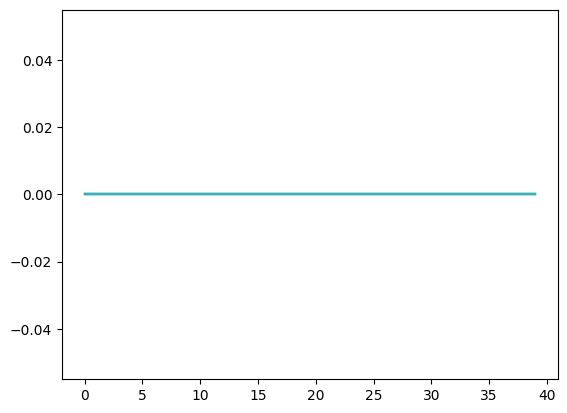

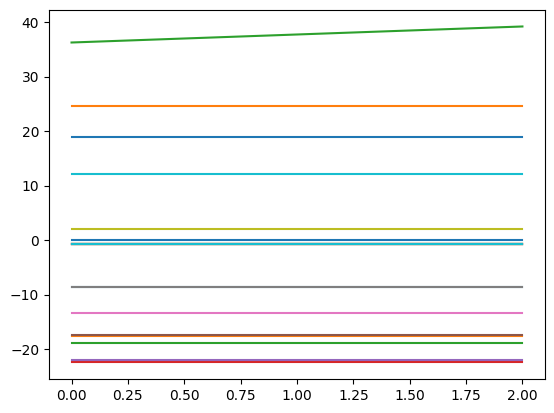

In [ ]:
import pandas as pd
import time
import copy

# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)
#####################################################
# if you do not want to train just load and test
test_only = 1   
# choose and simulate system
system_name= "trajectory"
system_props = get_system(system_name)
ttc_dict = set_dictvars(system_props)
system_props["atk_offset"] = 10
system_props["sim_length"] = 10+aus[i,:].shape[0]
ttc = system(**system_props)
datacount = aus.shape[0]
data1  = np.empty((datacount,ttc.simlen,2*ttc.ydim+ttc.udim+2*ttc.xdim))
# data1 =np.matrix([[]])
# while datacount > 0:
for i in range(0,datacount):
    ttc.reset()
    ttc.x[:,0] = inits[i,:]
    ttc.xatk[:,0] = inits[i,:]
    ttc.au[:,ttc.atk_offset:ttc.atk_offset+aus[i,:].shape[0]] = np.reshape(np.transpose(aus[i,:]),(ttc.udim,aus.shape[1]))
    ttc.ay[:,ttc.atk_offset:ttc.atk_offset+ays[i,:].shape[0]] = np.reshape(np.transpose(ays[i,:]),(ttc.ydim,ays.shape[1]))
    ttc = ttc.simulate()
    data1[i,:,:] = np.transpose(np.vstack((ttc.yatk,ttc.ratk,ttc.xatk,ttc.xhatatk,ttc.uatk)))

predicted = np.empty_like(data1)
verbosity=0
# preprocessing the data : scaling and divding training and test datasets
scaler, inp_train, outp_train, inp_val, outp_val, inp_test, outp_test = preprocess(ttc,data1,verbose=verbosity)

# parameters to build and train the predictor
path ='predictor/'+system_name+'/'
epochs=100
batch_size=inp_train.shape[0]
validation_split=0.3

# building 
predictor = build_predictor(inp_train, outp_train)
loss, acc = predictor.evaluate(inp_test, outp_test, verbose=2)
print(f"Untrained model, accuracy: {100 * acc}%")
# training 
if test_only==0:
    history = train_predictor(predictor, inp_train, outp_train, inp_test, path ,epochs, batch_size, validation_split, verbosity=verbosity)
    # evaluation of the predictor model
    loss, acc = predictor.evaluate(inp_test, outp_test, verbose=2)
    print(f"Trained model, accuracy: {100 * acc}%")
else:
    # predictor = tf.keras.models.load_model(path)
    predictor.load_weights(path)
    # evaluation of the restored predictor model
    loss, acc = predictor.evaluate(inp_test, outp_test, verbose=2)
    print(f"Restored model, accuracy: {100 * acc}%")


start_pred = time.time()
# multivar prediction
prediction = predictor.predict(inp_test)

# postprocessing predicted data : rescale and merge
predicted = postprocess(inp_train, outp_train, inp_test, prediction, scaler, verbose=verbosity)
end_pred = time.time()

print(f"time elapsed to predict and post process:{-start_pred+end_pred}")

# plotting
plt.figure()
plt.plot(inp_test[:,:,0], label='test input')
plt.figure()
plt.plot(predicted[:,:,0], label = "predicted output")